In [25]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import pandas as pd
from sklearn import metrics

In [26]:
def median(data):
    data.sort()
    half = len(data) // 2
    medianvalue = (data[half] + data[~half])/2
    return medianvalue

In [27]:
#load RF model
with open('./EAGLE.pkl', 'rb') as file:
    rf_loaded = pickle.load(file)

In [28]:
#read data
data = pd.read_csv('./testdata.txt')

In [29]:
print(data)

    Unnamed: 0   fexsitu     massallar       magr        r90        r50  \
0            0  0.051858  2.078731e+10  12.733284  18.484321   5.545959   
1            1  0.119957  9.726045e+10  11.278442  13.791966   4.243068   
2            2  0.100473  1.376720e+11  10.929787  28.248462   8.143871   
3            3  0.210379  1.361934e+11  10.603453  19.608509   6.455194   
4            4  0.154096  1.377133e+11  10.748738  22.538442   6.620222   
5            5  0.139827  1.326431e+11  10.917181  25.286805   6.978221   
6            6  0.149978  1.512284e+11  10.682844  16.692963   5.238175   
7            7  0.160090  3.211466e+10  11.816799  20.486778   7.221454   
8            8  0.281477  4.236149e+10  11.567334  23.240442   8.388000   
9            9  0.290715  7.600397e+10  10.790675  19.221151   5.531479   
10          10  0.293444  3.700153e+10  11.729747  25.277146   7.269824   
11          11  0.400912  5.735413e+10  11.248612  24.625939   6.693614   
12          12  0.112332 

In [30]:
strfeature = ['finnerhalo','magr','colorgr','r90','r50','C2D','fouterhalo']

In [31]:
X_test = data[strfeature]
y_test = data['fexsitu']

In [33]:
#use model to predict fexsitu
random_forest_predict=rf_loaded.predict(X_test)

#if you obtain fexsitu from simulation, you can test the predicted performance.
random_forest_error=random_forest_predict-y_test
arrayrandom_forest_error = np.array(random_forest_error)
medianerror = median(arrayrandom_forest_error)
sortarrayrandom_forest_error = np.sort(arrayrandom_forest_error)
stderror = np.std(arrayrandom_forest_error)
random_forest_R2=np.array([metrics.r2_score(y_test,random_forest_predict)])
print(random_forest_R2)
print(random_forest_predict)

[0.56643858]
[0.10368125 0.16264092 0.17725697 0.24331775 0.14104926 0.23205091
 0.18231352 0.20405018 0.18424779 0.21175122 0.36437972 0.31710627
 0.15396272 0.10293906 0.0977317  0.27818586 0.21169676 0.1646519
 0.13490671 0.35631083 0.13900592 0.14449846 0.28076608 0.20831434
 0.1378126  0.14354443 0.29815827 0.1817512  0.27488219 0.18875908
 0.1664495  0.18958602 0.14160814 0.13112801 0.20273934 0.30722777
 0.18778204 0.17234892 0.13262101 0.20177342 0.16095158 0.14612724
 0.13836281 0.17450455 0.48694709 0.29770528]


Text(0, 0.5, 'Predicted')

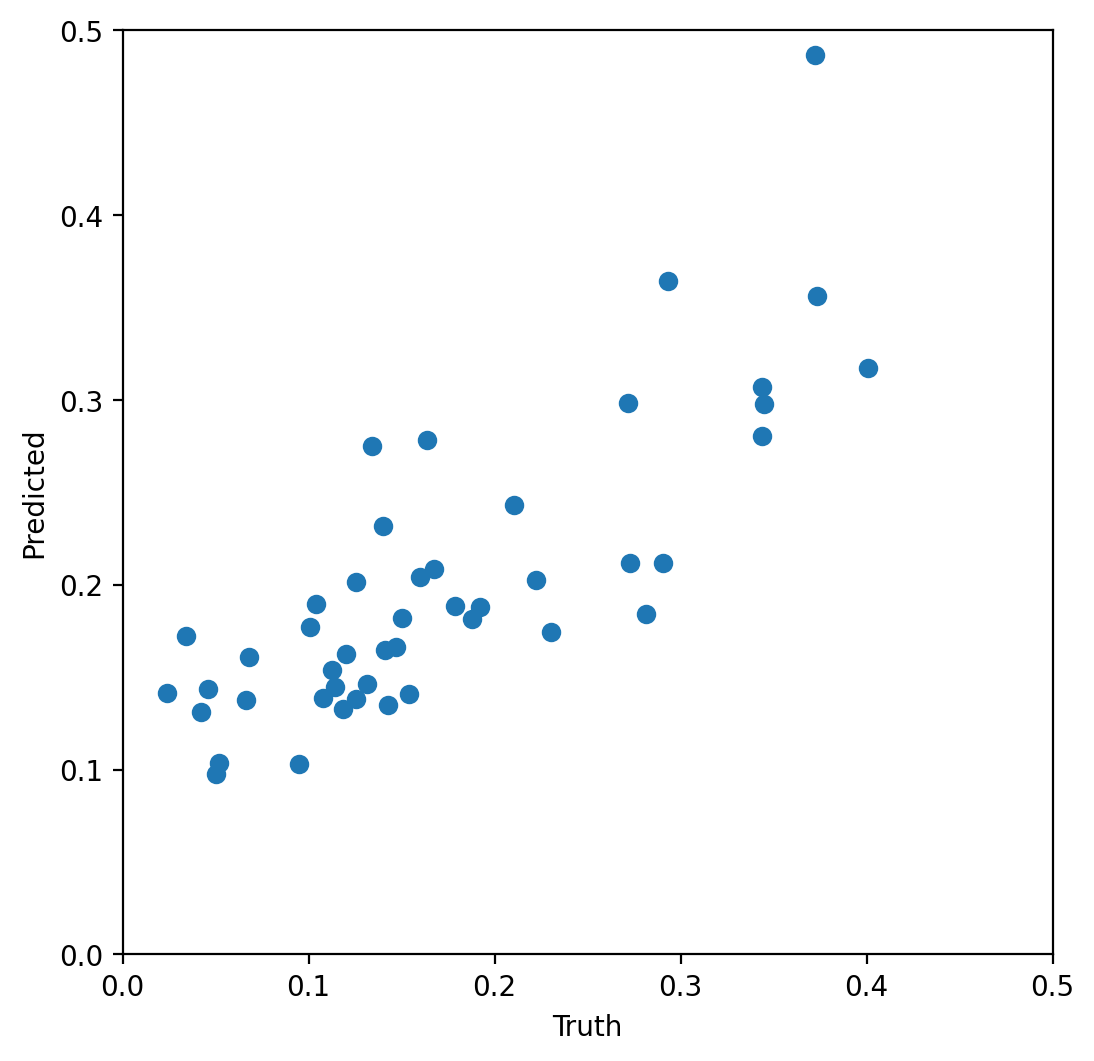

In [39]:
plt.figure(dpi=200,figsize=(6,6))
plt.scatter(y_test,random_forest_predict)
plt.xlim([0,0.5])
plt.ylim([0,0.5])
plt.xlabel('Truth')
plt.ylabel('Predicted')